# Content


>[Content](#scrollTo=zXBUjSnNweZj)

>[Neural Networks](#scrollTo=vc8WxKSxryRw)

>>[Regression](#scrollTo=noEMTQ8r_TA5)

>>>[Linear Regression](#scrollTo=VmR989Y_qmMW)

>>>[Logistic Regression](#scrollTo=FQssfpdxywqs)

>>>>[Save and Load Model](#scrollTo=sP8HXTlm4OUu)

>>[Artificial Neural Networks](#scrollTo=Epw_6GeQEV1F)

>>>[Multiclass Classification](#scrollTo=iDg9AGRp_Yo7)

>>>[Regression with ANN](#scrollTo=tqUkQaEDJJRQ)

>>[Convolution Neural Networks](#scrollTo=SPWQm3mvk52l)

>>>[Data Augmentation](#scrollTo=ZhYeK1Vjthsi)



# Neural Networks

## Regression

### Linear Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

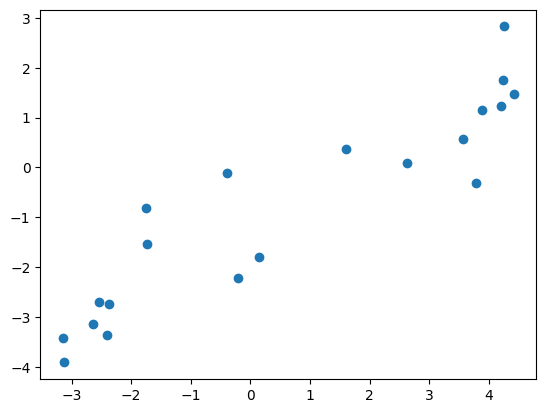

In [ ]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# Plot the data
plt.scatter(X, Y);

In [ ]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

type(inputs)

torch.Tensor

In [ ]:
# Create the linear regression model
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 8.0657
Epoch 2/30, Loss: 5.3005
Epoch 3/30, Loss: 3.5662
Epoch 4/30, Loss: 2.4755
Epoch 5/30, Loss: 1.7875
Epoch 6/30, Loss: 1.3525
Epoch 7/30, Loss: 1.0767
Epoch 8/30, Loss: 0.9014
Epoch 9/30, Loss: 0.7897
Epoch 10/30, Loss: 0.7184
Epoch 11/30, Loss: 0.6728
Epoch 12/30, Loss: 0.6436
Epoch 13/30, Loss: 0.6248
Epoch 14/30, Loss: 0.6127
Epoch 15/30, Loss: 0.6049
Epoch 16/30, Loss: 0.5999
Epoch 17/30, Loss: 0.5966
Epoch 18/30, Loss: 0.5945
Epoch 19/30, Loss: 0.5931
Epoch 20/30, Loss: 0.5923
Epoch 21/30, Loss: 0.5917
Epoch 22/30, Loss: 0.5913
Epoch 23/30, Loss: 0.5911
Epoch 24/30, Loss: 0.5909
Epoch 25/30, Loss: 0.5908
Epoch 26/30, Loss: 0.5907
Epoch 27/30, Loss: 0.5907
Epoch 28/30, Loss: 0.5907
Epoch 29/30, Loss: 0.5906
Epoch 30/30, Loss: 0.5906


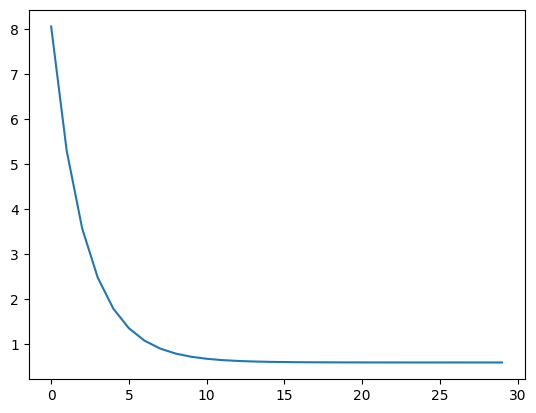

In [ ]:
# Plot the loss per iteration
plt.plot(losses);

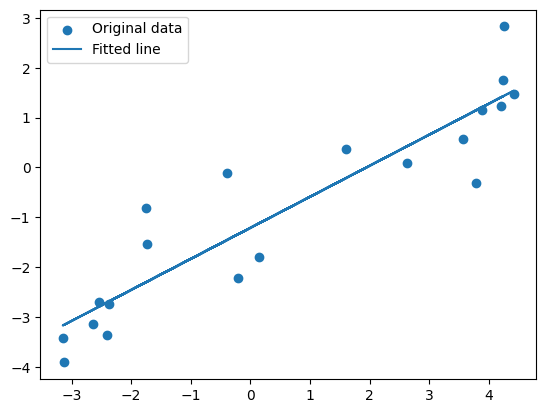

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy() # Throws error if not detached first
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Another way, instead of calling detach
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-0.21129191],
       [-1.4522172 ],
       [-2.6882527 ],
       [ 1.4075803 ],
       [-2.7937555 ],
       [ 1.540198  ],
       [ 1.2103118 ],
       [ 1.0122842 ],
       [ 1.4273728 ],
       [-2.3007736 ],
       [ 1.434842  ],
       [ 0.4251157 ],
       [-2.2886307 ],
       [-3.161564  ],
       [-1.3392979 ],
       [-3.171773  ],
       [-2.85942   ],
       [ 1.1497535 ],
       [-2.7146525 ],
       [-1.1201562 ]], dtype=float32)

In [ ]:
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.62295854]] [-1.2115074]


### Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [ ]:
# load the data
data = load_breast_cancer()

# check the type of 'data'
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [ ]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [ ]:
# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1)) # In PyTorch we need the output to be a 2d array of (N, 1) instead of an 1d array
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [ ]:
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

# We don't put the sigmoid in the model anymore since it will be calculated along with the loss in the criterion.
# model = nn.Linear(D, 1)

# Loss and optimizer
criterion = nn.BCELoss()

# This function calculates the BCE loss directly from the logits which are the outputs from the logistic function.
# criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracies = np.zeros(n_epochs)
test_accuracies = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss. For this we will run the model again, but now on the test set and recalculate the loss for it.
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()


  # Get accuracy
  with torch.no_grad():
    p_train = np.round(outputs.numpy())
    train_acc = np.mean(p_train == y_train.numpy())

    p_test = np.round(outputs_test.numpy())
    test_acc = np.mean(p_test == y_test.numpy())

  #Save accuracies
  train_accuracies[it] = train_acc
  test_accuracies[it] = test_acc

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch 50/1000, Train Loss: 0.5664, Test Loss: 0.5736, Train Acc: 0.7874, Test Acc: 0.7766
Epoch 100/1000, Train Loss: 0.4127, Test Loss: 0.4090, Train Acc: 0.9108, Test Acc: 0.9096
Epoch 150/1000, Train Loss: 0.3299, Test Loss: 0.3194, Train Acc: 0.9344, Test Acc: 0.9415
Epoch 200/1000, Train Loss: 0.2784, Test Loss: 0.2640, Train Acc: 0.9528, Test Acc: 0.9628
Epoch 250/1000, Train Loss: 0.2434, Test Loss: 0.2265, Train Acc: 0.9554, Test Acc: 0.9628
Epoch 300/1000, Train Loss: 0.2180, Test Loss: 0.1995, Train Acc: 0.9606, Test Acc: 0.9681
Epoch 350/1000, Train Loss: 0.1989, Test Loss: 0.1793, Train Acc: 0.9633, Test Acc: 0.9681
Epoch 400/1000, Train Loss: 0.1838, Test Loss: 0.1635, Train Acc: 0.9659, Test Acc: 0.9681
Epoch 450/1000, Train Loss: 0.1717, Test Loss: 0.1509, Train Acc: 0.9685, Test Acc: 0.9734
Epoch 500/1000, Train Loss: 0.1617, Test Loss: 0.1406, Train Acc: 0.9685, Test Acc: 0.9734
Epoch 550/1000, Train Loss: 0.1533, Test Loss: 0.1321, Train Acc: 0.9711, Test Acc: 0.9734


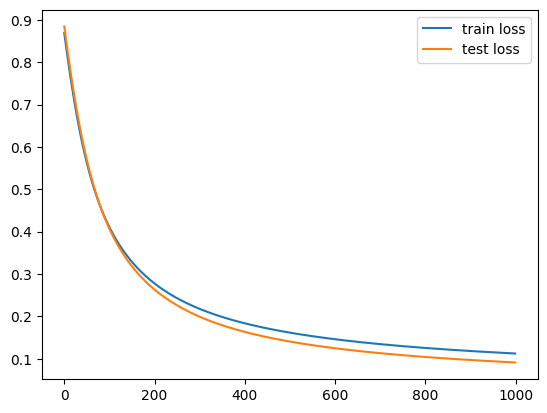

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

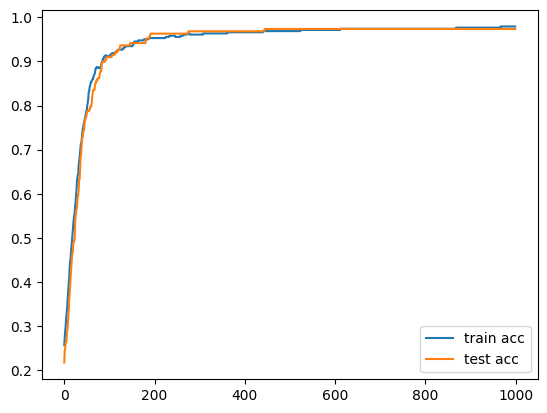

In [ ]:
# Plot the train acc and test acc per iteration
plt.plot(train_accuracies, label = 'train acc')
plt.plot(test_accuracies, label = 'test acc')
plt.legend()
plt.show()

In [ ]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9790, Test acc: 0.9734


#### Save and Load Model

In [ ]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3507, -0.5537, -0.3271, -0.2566, -0.2634, -0.1337, -0.3113, -0.4842,
                       -0.0696,  0.5199, -0.4179,  0.0270, -0.4713, -0.2177,  0.0490,  0.0698,
                        0.0194, -0.2528,  0.0112,  0.6345, -0.3092, -0.3225, -0.3122, -0.1879,
                       -0.4533, -0.1696, -0.4545, -0.1962, -0.2190, -0.2546]])),
             ('0.bias', tensor([0.4475]))])

In [ ]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [ ]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [ ]:
# Evaluate the new model
# Results should be the same!
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9790, Test acc: 0.9734


## Artificial Neural Networks

### Multiclass Classification

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root='.', #File path we want to download the file to
    train=True, #Return train dataset
    transform=transforms.ToTensor(), #Preprocessing done by the library for us
    download=True)

In [ ]:
train_dataset.data.max(), \
train_dataset.data.shape, \
train_dataset.targets

(tensor(255, dtype=torch.uint8),
 torch.Size([60000, 28, 28]),
 tensor([5, 0, 4,  ..., 5, 6, 8]))

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
# Build the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [ ]:
# Since we will be using larger datasets we will be using GPUs which are much more efficient in doing matrix operations
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Loss and optimizer

# Cross entropy loss functions contains the softmax for multiple categories
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Data loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling

batch_size = 128
# Unwanted correlations will be introduced if we don't shuffle the batches during training
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)

#For evaluation there is no need to shuffle anymore, since the model won't change during evaluation
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False)


In [ ]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [ ]:
# Train the model
n_epochs = 10

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = [] #Empty list that will store the loss per batch
  for inputs, targets in train_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # reshape the input (N x D)
    inputs = inputs.view(-1, 784)

    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  # Get train loss and test loss
  train_loss = np.mean(train_loss) # a little misleading since we've been training the model for each of the batch losses

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  # Save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.4186, Test Loss: 0.2200
Epoch 2/10, Train Loss: 0.1953, Test Loss: 0.1600
Epoch 3/10, Train Loss: 0.1433, Test Loss: 0.1268
Epoch 4/10, Train Loss: 0.1100, Test Loss: 0.1073
Epoch 5/10, Train Loss: 0.0890, Test Loss: 0.0950
Epoch 6/10, Train Loss: 0.0735, Test Loss: 0.0855
Epoch 7/10, Train Loss: 0.0621, Test Loss: 0.0834
Epoch 8/10, Train Loss: 0.0528, Test Loss: 0.0784
Epoch 9/10, Train Loss: 0.0441, Test Loss: 0.0793
Epoch 10/10, Train Loss: 0.0381, Test Loss: 0.0775


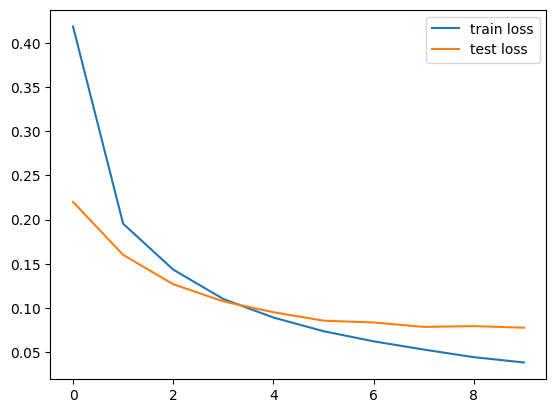

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
n_correct = 0.
n_total = 0.
visualize = 1
for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)
  if visualize:
    print(outputs[0])
    print(outputs.shape)
    visualize = 0
  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


tensor([-10.8590,  -6.4893,  -2.2948,   6.5153, -22.6838,   2.9163, -20.2083,
        -16.4376,   0.7578,  -5.2605], device='cuda:0',
       grad_fn=<SelectBackward0>)
torch.Size([128, 10])
Train acc: 0.9898, Test acc: 0.9774


In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion matrix, without normalization
[[ 955    0    5    0    2    2    4    2    4    6]
 [   0 1125    4    0    0    1    1    1    3    0]
 [   0    1 1019    2    1    0    1    4    4    0]
 [   0    0    3  981    0    8    0    9    5    4]
 [   0    0    5    0  961    0    3    3    1    9]
 [   2    0    0    6    1  873    3    0    5    2]
 [   5    3    6    1    3    4  933    0    3    0]
 [   0    4   11    2    0    0    0 1002    0    9]
 [   4    1    7    5    6    4    1    4  936    6]
 [   0    3    0    2    8    2    0    4    1  989]]


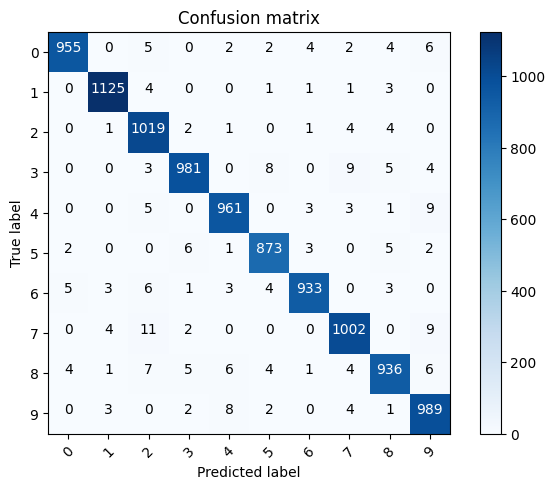

In [ ]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)

  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

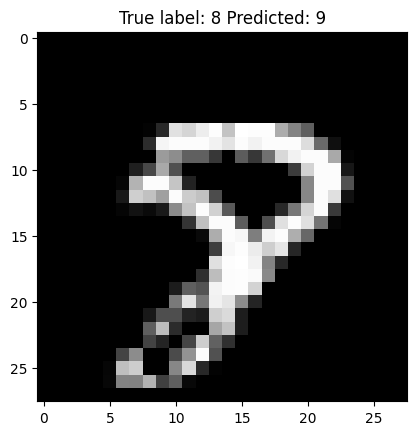

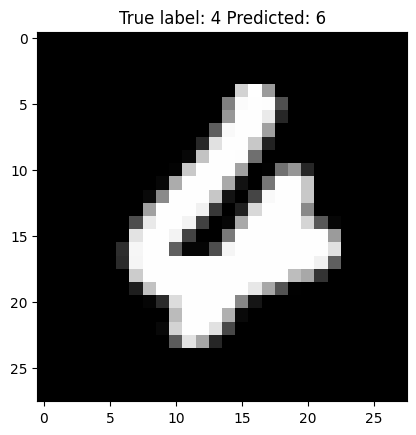

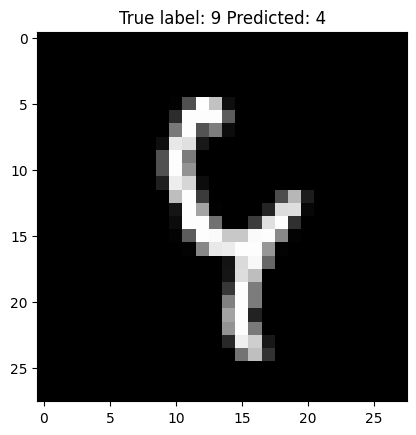

In [ ]:
# Show some misclassified examples
for misclassifications in range(3):
    misclassified_idx = np.where(p_test != y_test)[0]
    i = np.random.choice(misclassified_idx)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])));
    plt.show()

### Regression with ANN

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

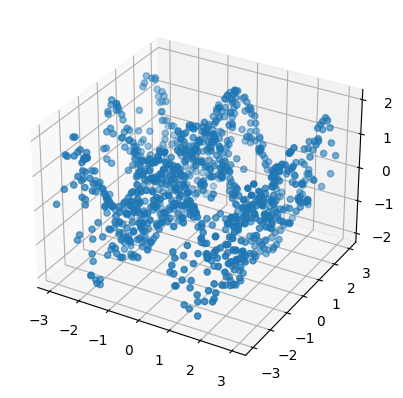

In [ ]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [ ]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    if (it + 1) % 50 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.5370
Epoch 100/1000, Train Loss: 0.2968
Epoch 150/1000, Train Loss: 0.1685
Epoch 200/1000, Train Loss: 0.0843
Epoch 250/1000, Train Loss: 0.0335
Epoch 300/1000, Train Loss: 0.0136
Epoch 350/1000, Train Loss: 0.0084
Epoch 400/1000, Train Loss: 0.0088
Epoch 450/1000, Train Loss: 0.0044
Epoch 500/1000, Train Loss: 0.0039
Epoch 550/1000, Train Loss: 0.0034
Epoch 600/1000, Train Loss: 0.0032
Epoch 650/1000, Train Loss: 0.0029
Epoch 700/1000, Train Loss: 0.0037
Epoch 750/1000, Train Loss: 0.0027
Epoch 800/1000, Train Loss: 0.0032
Epoch 850/1000, Train Loss: 0.0025
Epoch 900/1000, Train Loss: 0.0072
Epoch 950/1000, Train Loss: 0.0024
Epoch 1000/1000, Train Loss: 0.0023


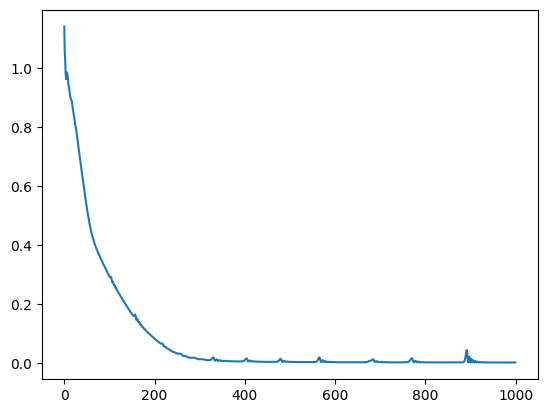

In [ ]:
plt.plot(train_losses)

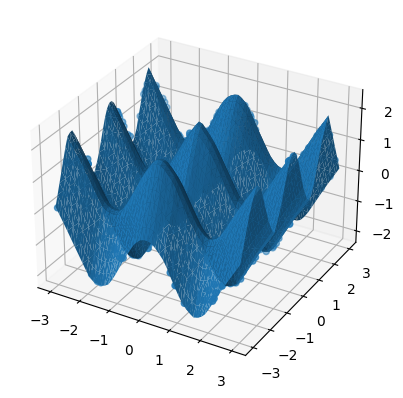

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50) #50 points between -3 and 3
  xx, yy = np.meshgrid(line, line) # Creates a matrix of datapoints in the plane
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  #ax.scatter(Xgrid[:,0], Xgrid[:,1])

  plt.show()

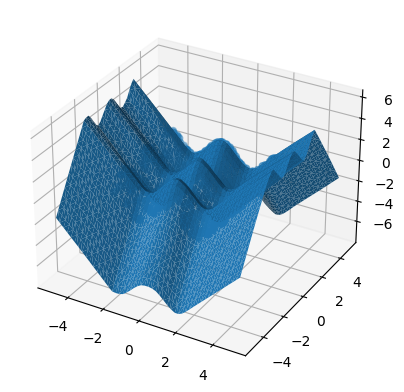

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

## Convolution Neural Networks

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [4]:
train_dataset.data.shape, train_dataset.targets

(torch.Size([60000, 28, 28]), tensor([9, 0, 0,  ..., 3, 0, 5]))

In [5]:
test_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

In [6]:
# number of classes
K = len(set(train_dataset.targets.numpy()))
print("number of classes:", K)

number of classes: 10


In [7]:
# Define the model
class CNN(nn.Module): #Inherits from the nn.Module PyTorch class
  def __init__(self, K):
    super(CNN, self).__init__()
    self.conv_layers = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
      nn.ReLU()
    )
    # "No zero padding, non-unit strides"
    # https://pytorch.org/docs/stable/nn.html
    self.dense_layers = nn.Sequential(
      nn.Dropout(0.2),
      nn.Linear(128 * 2 * 2, 512),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(512, K)
    )

  def forward(self, X):
    out = self.conv_layers(X)
    out = out.view(out.size(0), -1)
    out = self.dense_layers(out)
    return out

In [8]:
# Instantiate the model
model = CNN(K)

The same model! Without using Sequential

```python
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    
    # define the conv layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

    # define the linear layers
    self.fc1 = nn.Linear(128 * 3 * 3, 1024)
    self.fc2 = nn.Linear(1024, K)
  
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 128 * 3 * 3)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x
```

The same model! Using the newly introduced "Flatten"


```python
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.Dropout(0.2),
    nn.Linear(128 * 2 * 2, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, K)   
)
```

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (dense_layers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
# Data loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [12]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading

    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')

  return train_losses, test_losses

In [13]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 0.6419,       Test Loss: 0.4869, Duration: 0:00:13.481442
Epoch 2/15, Train Loss: 0.4226,       Test Loss: 0.3911, Duration: 0:00:11.320866
Epoch 3/15, Train Loss: 0.3611,       Test Loss: 0.3527, Duration: 0:00:11.424388
Epoch 4/15, Train Loss: 0.3287,       Test Loss: 0.3357, Duration: 0:00:16.139389
Epoch 5/15, Train Loss: 0.3023,       Test Loss: 0.3233, Duration: 0:00:09.387739
Epoch 6/15, Train Loss: 0.2802,       Test Loss: 0.3179, Duration: 0:00:09.577425
Epoch 7/15, Train Loss: 0.2626,       Test Loss: 0.3020, Duration: 0:00:09.612886
Epoch 8/15, Train Loss: 0.2492,       Test Loss: 0.2995, Duration: 0:00:08.888914
Epoch 9/15, Train Loss: 0.2332,       Test Loss: 0.3061, Duration: 0:00:10.023178
Epoch 10/15, Train Loss: 0.2208,       Test Loss: 0.2862, Duration: 0:00:09.653076
Epoch 11/15, Train Loss: 0.2072,       Test Loss: 0.2996, Duration: 0:00:09.602385
Epoch 12/15, Train Loss: 0.1956,       Test Loss: 0.2918, Duration: 0:00:10.555294
Epoch 13/15, 

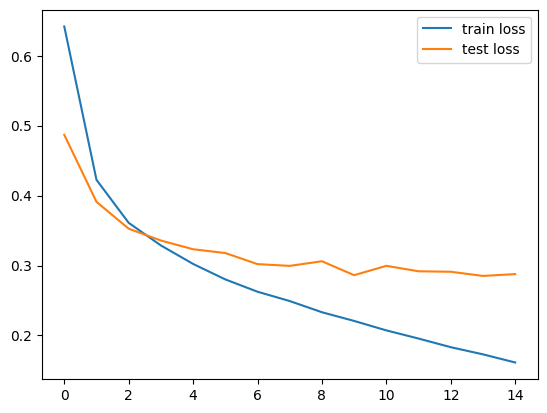

In [15]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [14]:
# Accuracy

model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9596, Test acc: 0.9047


### Data Augmentation

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [36]:
# examples: https://pytorch.org/docs/stable/torchvision/transforms.html
transformer_train = torchvision.transforms.Compose([
  # torchvision.transforms.ColorJitter(
  #     brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
  transforms.RandomCrop(32, padding=4),
  torchvision.transforms.RandomHorizontalFlip(p=0.5),
  # torchvision.transforms.RandomRotation(degrees=15),
  torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
  # torchvision.transforms.RandomPerspective(),
  transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transformer_train,
    download=True)

test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
# we are working with color images now
train_dataset.data.shape

(50000, 32, 32, 3)

In [52]:
# behaves differently from MNIST / Fashion MNIST
# it is a list!
train_dataset.targets[:5]

[6, 9, 9, 4, 1]

In [39]:
# number of classes
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


In [40]:
# Data loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [41]:
# Make one for testing
train_dataset_fixed = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
train_loader_fixed = torch.utils.data.DataLoader(
    dataset=train_dataset_fixed,
    batch_size=batch_size,
    shuffle=False)

Files already downloaded and verified


In [42]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=1,
                                           shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.6314, 0.6196, 0.6824],
          [0.0000, 0.0000, 0.0000,  ..., 0.6510, 0.6745, 0.7490],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5255, 0.6196, 0.5922],
          [0.0000, 0.0000, 0.0000,  ..., 0.5647, 0.5961, 0.6000],
          [0.0000, 0.0000, 0.0000,  ..., 0.5882, 0.6431, 0.6353]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.6275, 0.6157, 0.6549],
          [0.0000, 0.0000, 0.0000,  ..., 0.6353, 0.6471, 0.7098],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5098, 0.5961, 0.5725],
          [0.0000, 0.0000, 0.0000,  ..., 0.5490, 0.5765, 0.5804],
          [0.0000, 0.0000, 0.0000,  ..., 0.5647, 0.6196, 0.6118]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.5961, 0.5725, 0.5843],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [43]:
# Define the model
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()

    # define the conv layers
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
    )

    # Useful: https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d
    # H_out = H_in + 2p - 2 --> p = 1 if H_out = H_in

    # Easy to calculate output
    # 32 > 16 > 8 > 4

    # define the linear layers
    self.fc1 = nn.Linear(128 * 4 * 4, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.size(0), -1)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x


In [44]:
# Instantiate the model
model = CNN(K)

In [45]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [46]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [47]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # print("inputs.shape:", inputs.shape)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      # print("about to get model output")
      outputs = model(inputs)
      # print("done getting model output")
      # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
      loss = criterion(outputs, targets)

      # Backward and optimize
      # print("about to optimize")
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading

    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')

  return train_losses, test_losses

In [48]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 1.4864,       Test Loss: 1.1078, Duration: 0:00:33.106292
Epoch 2/15, Train Loss: 1.0400,       Test Loss: 0.8814, Duration: 0:00:28.192692
Epoch 3/15, Train Loss: 0.8519,       Test Loss: 0.8286, Duration: 0:00:29.270314
Epoch 4/15, Train Loss: 0.7626,       Test Loss: 0.7618, Duration: 0:00:28.406826
Epoch 5/15, Train Loss: 0.7007,       Test Loss: 0.6780, Duration: 0:00:28.400232
Epoch 6/15, Train Loss: 0.6448,       Test Loss: 0.6782, Duration: 0:00:29.545522
Epoch 7/15, Train Loss: 0.6067,       Test Loss: 0.6689, Duration: 0:00:28.197081
Epoch 8/15, Train Loss: 0.5817,       Test Loss: 0.6509, Duration: 0:00:28.546930
Epoch 9/15, Train Loss: 0.5602,       Test Loss: 0.6072, Duration: 0:00:29.780890
Epoch 10/15, Train Loss: 0.5347,       Test Loss: 0.5744, Duration: 0:00:29.579275
Epoch 11/15, Train Loss: 0.5129,       Test Loss: 0.5400, Duration: 0:00:28.383828
Epoch 12/15, Train Loss: 0.5020,       Test Loss: 0.5380, Duration: 0:00:28.705585
Epoch 13/15, 

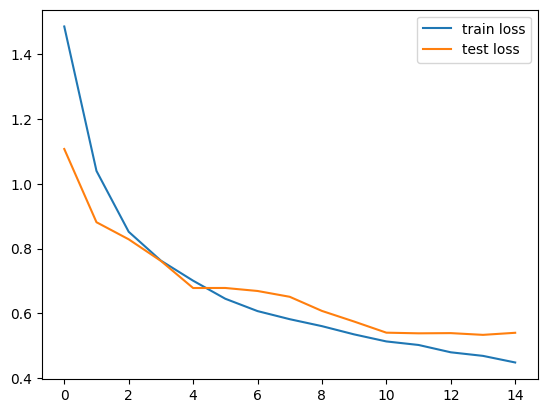

In [49]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [50]:
# Accuracy

model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader_fixed:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.8619, Test acc: 0.8214


In [51]:
from torchsummary import summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6